In [1]:
from keras.datasets import mnist
from keras.layers import Input, Dense
from keras.models import Model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
from google.colab import files
uploaded = files.upload()

Saving DA.png to DA.png


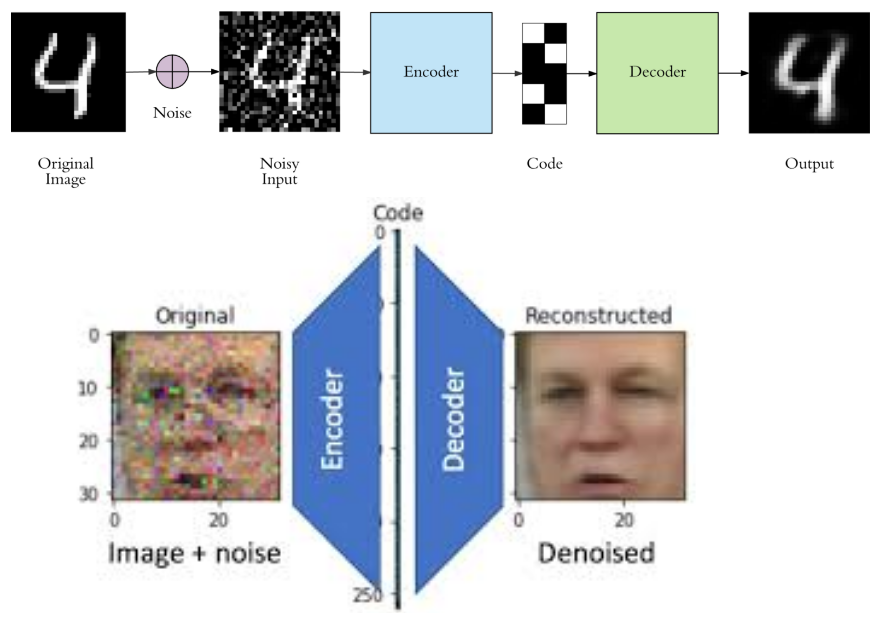

In [3]:
from  IPython.display  import Image
Image('DA.png')

In [4]:
#loading only images and not their labels
(X_train, _), (X_test, _) = mnist.load_data()

X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

X_train = X_train.reshape(len(X_train), np.prod(X_train.shape[1:]))
X_test = X_test.reshape(len(X_test), np.prod(X_test.shape[1:]))
X_train_noisy = X_train + np.random.normal(loc=0.0, scale=0.5, size=X_train.shape)
X_train_noisy = np.clip(X_train_noisy, 0., 1.)
X_test_noisy = X_test + np.random.normal(loc=0.0, scale=0.5, size=X_test.shape)
X_test_noisy = np.clip(X_test_noisy, 0., 1.)
print(X_train_noisy.shape)
print(X_test_noisy.shape)

11493376/11490434 [==============================] - 1s 0us/step
(60000, 784)
(10000, 784)


In [5]:
#Input image
input_img= Input(shape=(784,))
# encoded and decoded layer for the autoencoder
encoded = Dense(units=128, activation='relu')(input_img)
encoded = Dense(units=64, activation='relu')(encoded)
encoded = Dense(units=32, activation='relu')(encoded)
decoded = Dense(units=64, activation='relu')(encoded)
decoded = Dense(units=128, activation='relu')(decoded)
decoded = Dense(units=784, activation='sigmoid')(decoded)
# Building autoencoder
autoencoder=Model(input_img, decoded)
#extracting encoder
encoder = Model(input_img, encoded)

W0725 10:18:02.768834 139937588172672 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0725 10:18:02.813434 139937588172672 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0725 10:18:02.826133 139937588172672 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [8]:
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_5 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_6 (Dense)              (None, 784)               101136    
Total para

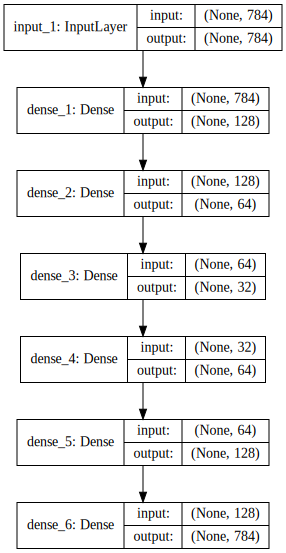

In [9]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
SVG(model_to_dot(autoencoder, show_shapes=True).create(prog='dot', format='svg'))

In [10]:
# compiling the autoencoder
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy', metrics=['accuracy'])
# Fitting the noise trained data to the autoencoder 
autoencoder.fit(X_train_noisy, X_train_noisy,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(X_test_noisy, X_test_noisy))

W0725 10:20:32.729398 139937588172672 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0725 10:20:32.756914 139937588172672 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W0725 10:20:32.763386 139937588172672 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0725 10:20:33.216212 139937588172672 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. P

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 6s 105us/step - loss: 0.5950 - acc: 0.4002 - val_loss: 0.5650 - val_acc: 0.4302
Epoch 2/100
60000/60000 [==============================] - 2s 39us/step - loss: 0.5646 - acc: 0.4306 - val_loss: 0.5643 - val_acc: 0.4304
Epoch 3/100
60000/60000 [==============================] - 2s 39us/step - loss: 0.5641 - acc: 0.4307 - val_loss: 0.5640 - val_acc: 0.4303
Epoch 4/100
60000/60000 [==============================] - 2s 39us/step - loss: 0.5637 - acc: 0.4309 - val_loss: 0.5635 - val_acc: 0.4306
Epoch 5/100
60000/60000 [==============================] - 2s 38us/step - loss: 0.5631 - acc: 0.4313 - val_loss: 0.5625 - val_acc: 0.4314
Epoch 6/100
60000/60000 [==============================] - 2s 39us/step - loss: 0.5615 - acc: 0.4327 - val_loss: 0.5603 - val_acc: 0.4336
Epoch 7/100
60000/60000 [==============================] - 2s 39us/step - loss: 0.5595 - acc: 0.4344 - val_loss: 0.5586 -

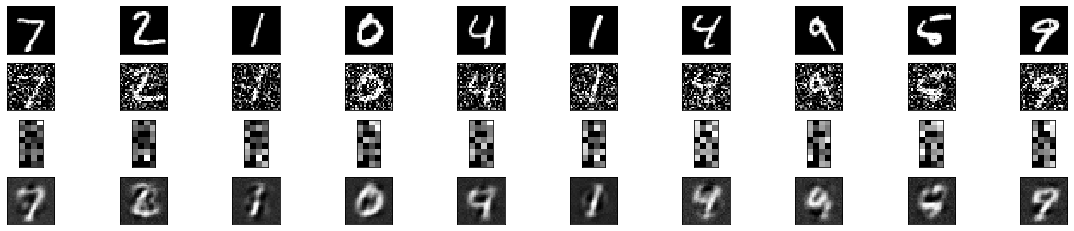

In [11]:
# reconstructing the image from autoencoder and encoder
encoded_imgs = encoder.predict(X_test_noisy)
predicted = autoencoder.predict(X_test_noisy)
# plotting the noised image, encoded image and the reconstructed image
plt.figure(figsize=(40, 4))
for i in range(10):
# display original images
    
    ax = plt.subplot(4, 20, i + 1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
# display noised images
    ax = plt.subplot(4, 20, i + 1+20)
    plt.imshow(X_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
# display encoded images    
    ax = plt.subplot(4, 20, 2*20+i + 1 )
    plt.imshow(encoded_imgs[i].reshape(8,4))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
# display reconstruction images
    ax = plt.subplot(4, 20, 3*20 +i+ 1)
    plt.imshow(predicted[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    
plt.show()